In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from surrogate_model import SurrogateModel
import ConfigSpace

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c



In [4]:
config_space = ConfigSpace.ConfigurationSpace.from_json('lcdb_config_space_knn.json')
df = pd.read_csv('config_performances_dataset-6.csv')
surrogate_model = SurrogateModel(config_space)
surrogate_model.fit(df)

In [8]:
anchors = sorted(df['anchor_size'].unique())
print(anchors[0],anchors[-1])

16 16000


c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)
c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)
c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, s

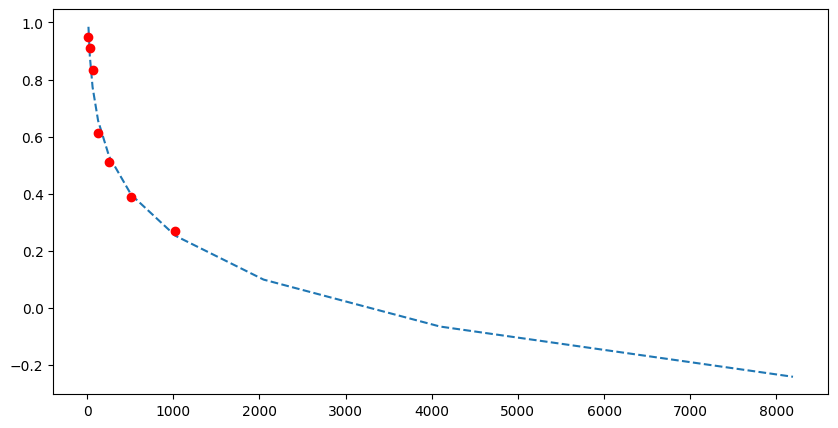

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


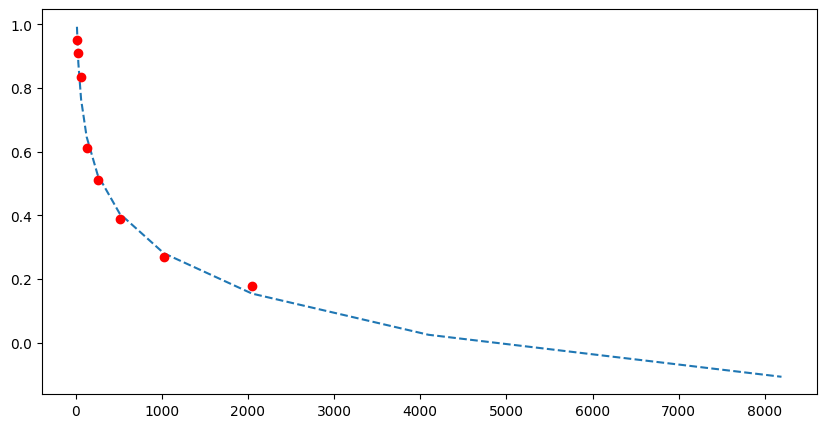

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


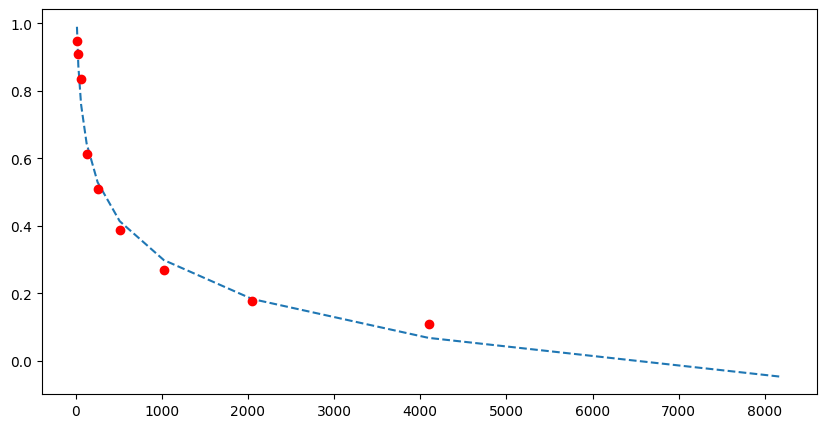

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


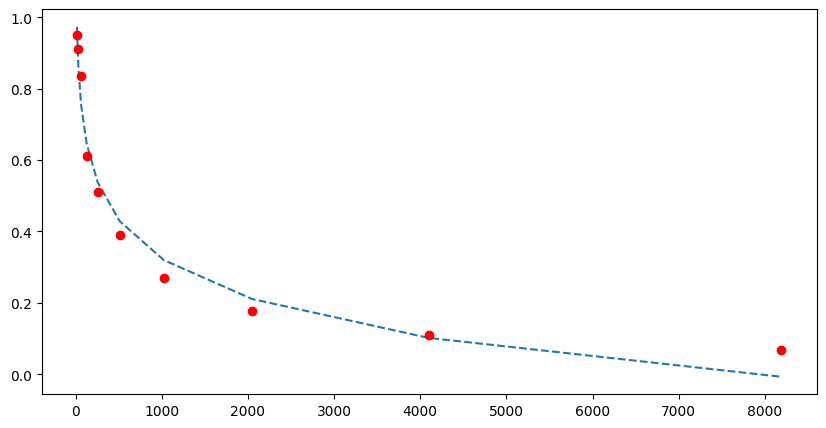

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


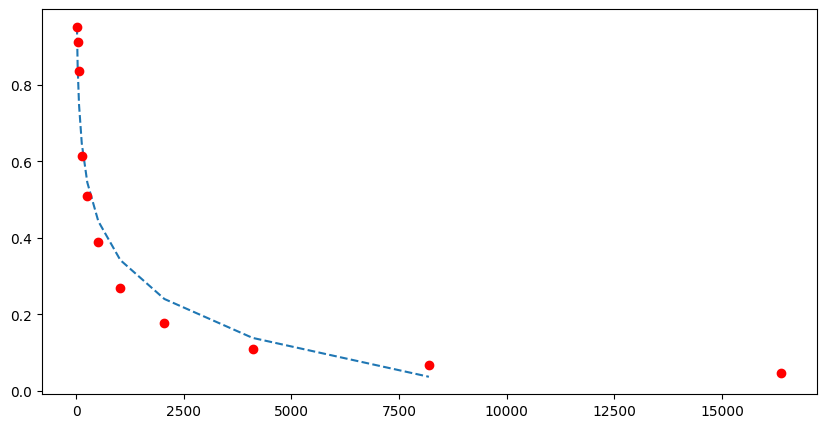

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


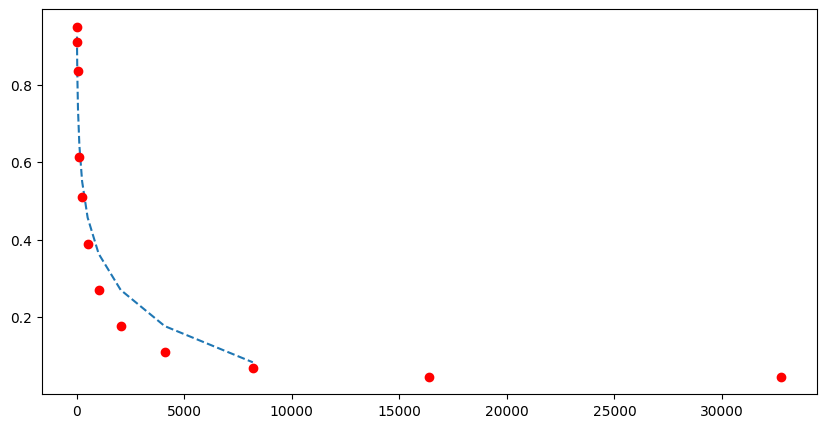

In [27]:
min_anchor = df.anchor_size.min()
max_anchor = df.anchor_size.max()
anchors = []
anchor = min_anchor
while anchor < max_anchor:
    anchors.append(anchor)
    anchor *=2
configuration = dict(config_space.sample_configuration())
results = []
for i in range(12):
    anchor = min_anchor * (2**i)
    configuration["anchor_size"] = anchor
    config = pd.DataFrame([dict(configuration)])
    performance = surrogate_model.predict(config)[0]
    results.append((anchor,performance))
    if len(results)>6:
        X = np.array([x for x,_ in results])
        y = np.array([y for _,y in results])

        target_func = func_powerlaw

        popt, pcov = curve_fit(target_func, X, y,maxfev=5000)

        plt.figure(figsize=(10, 5))
        plt.plot(anchors, target_func(anchors, *popt), '--')
        plt.plot(X, y, 'ro')
        plt.show()

In [22]:
results

[(16, 0.9461760000000009),
 (32, 0.9162030000000001),
 (64, 0.8677840000000002),
 (128, 0.689161),
 (256, 0.5830440000000003),
 (512, 0.45018699999999934),
 (1024, 0.3138200000000001),
 (2048, 0.20450100000000015),
 (4096, 0.12593799999999988),
 (8192, 0.07528999999999994)]

In [29]:
target_func(max_anchor, *popt)

-0.00680856481903902

In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'dataset-6': {'error': (3.216740164645107e-05, 2.0349805547428335e-06), 'r2': (0.9996875721757923, 2.0359621886568754e-05)}, 'dataset-11': {'error': (2.5358348125930887e-05, 2.597615878923163e-06), 'r2': (0.9984874268613403, 0.00016142716062538814)}, 'dataset-1457': {'error': (5.8255700432900574e-05, 1.267085537891093e-05), 'r2': (0.9949499273369945, 0.0012243567790219706)}})

dataset-6  \
error  (3.216740164645107e-05, 2.0349805547428335e-06)   
r2        (0.9996875721757923, 2.0359621886568754e-05)   

                                            dataset-11  \
error  (2.5358348125930887e-05, 2.597615878923163e-06)   
r2        (0.9984874268613403, 0.00016142716062538814)   

                                          dataset-1457  
error  (5.8255700432900574e-05, 1.267085537891093e-05)  
r2         (0.9949499273369945, 0.0012243567790219706)

In [3]:
df = pd.read_csv('surrogate_model_verified.csv')

In [5]:
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
 & Unnamed: 0 & dataset-6 & dataset-11 & dataset-1457 \\
\midrule
0 & error & 3.017e-05,2.16e-06 & 2.461e-05,2.28e-06 & 5.489e-05,7.21e-06 \\
1 & r2 & 1.00,0.00 & 1.00,0.00 & 1.00,0.00 \\
\bottomrule
\end{tabular}



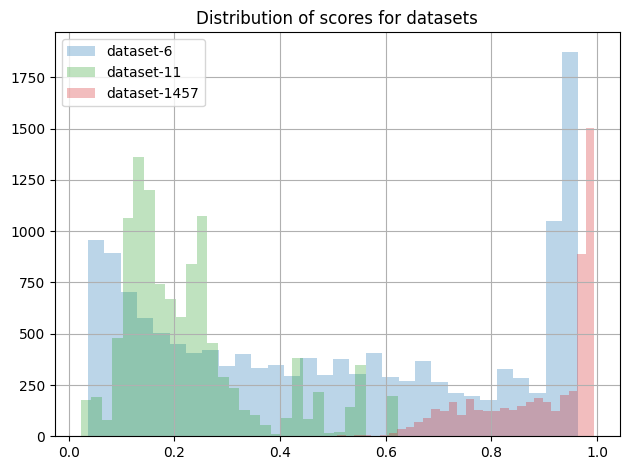

In [9]:
import matplotlib.pyplot as plt
data_sets = ['config_performances_dataset-6.csv',
            'config_performances_dataset-11.csv',
            'config_performances_dataset-1457.csv']
colors = ['tab:blue','tab:green','tab:red']

results = {}
for data_set,color in zip(data_sets,colors):
    data = pd.read_csv(data_set)
    name = data_set.split('_')[-1][:-4]
    plt.hist(data['score'], bins=30, color=color, alpha=0.3, label=name)
plt.legend()
plt.title('Distribution of scores for datasets')
plt.tight_layout()
plt.grid(True)
plt.savefig('surrogate_data.png')  

In [2]:
data_dict = {}
for data_set,color in zip(data_sets,colors):
    name = data_set.split('_')[-1][:-4]
    data_dict[name] = pd.read_csv(data_set)

NameError: name 'data_sets' is not defined

In [16]:
for name,data_set in data_dict.items():
    print(name)
    print(data_set['anchor_size'].describe())

dataset-6
count    13923.000000
mean      2643.619048
std       4240.933087
min         16.000000
25%         91.000000
50%        512.000000
75%       2896.000000
max      16000.000000
Name: anchor_size, dtype: float64
dataset-11
count    11220.000000
mean       154.363636
std        150.710081
min         16.000000
25%         32.000000
50%         91.000000
75%        256.000000
max        500.000000
Name: anchor_size, dtype: float64
dataset-1457
count    5236.000000
mean      332.714286
std       376.774698
min        16.000000
25%        45.000000
50%       154.500000
75%       512.000000
max      1200.000000
Name: anchor_size, dtype: float64


In [1]:
data_set

NameError: name 'data_set' is not defined

In [38]:
config_space = ConfigSpace.ConfigurationSpace.from_json('lcdb_config_space_knn.json')
for param in config_space.values():
    # either the column doesnt exist -> add and fill with default
    if param.name not in df.columns:
        df[param.name] = param.default_value
    # or it does, but there are missing values -> fill with defaults
    else:
        type_before = df[param.name].dtype
        df[param.name] = df[param.name].fillna(param.default_value)
        type_after = df[param.name].dtype
        if type_before!=type_after:
            print(type_before, type_after)
            print(param)

        

In [40]:
df = pd.read_csv('config_performances_dataset-6.csv')

In [44]:
theta_new = dict(config_space.sample_configuration())

In [ ]:
pd.DataFrame(theta_new,dtype = typing_dict)

{'metric': 'cosine',
 'n_neighbors': 4,
 'pp@cat_encoder': 'onehot',
 'pp@decomposition': 'lda',
 'pp@featuregen': 'poly',
 'pp@featureselector': 'none',
 'pp@scaler': 'std',
 'weights': 'uniform',
 'pp@poly_degree': 2,
 'pp@std_with_std': True}

In [46]:
typing_dict = df.dtypes.to_dict()

In [28]:
theta = df.dtypes
theta['pp@std_with_std']

dtype('bool')